# 1.데이터 불러오기

In [33]:
import pandas as pd

In [34]:
train = pd.read_csv('train_re.csv')
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,grey,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2010,7385000,Toyota


In [35]:
test = pd.read_csv('test_re.csv')
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,white,2017,Mercedes-Benz
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,white,2013,Honda
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2012,Mercedes-Benz
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,grey,2001,Toyota
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,white,2000,Toyota


In [36]:
test.info

<bound method DataFrame.info of       id                  title  odometer location    isimported  \
0      0    Mercedes-Benz C 300      1234    Abuja          New    
1      1           Honda Accord     29938    Abuja  Foreign Used   
2      2    Mercedes-Benz S 550     87501    Lagos  Foreign Used   
3      3          Toyota Sienna    180894    Lagos  Locally used   
4      4           Toyota Hiace    104814    Lagos  Foreign Used   
..   ...                    ...       ...      ...           ...   
431  431  Mercedes-Benz GLK 350     78175    Lagos  Foreign Used   
432  432        Honda Crosstour    129223    Lagos  Foreign Used   
433  433   Mercedes-Benz ML 350    100943    Lagos  Foreign Used   
434  434           Lexus GX 470     81463    Lagos  Foreign Used   
435  435          Toyota Sienna       646    Lagos  Foreign Used   

             engine transmission    fuel   paint  year          brand  
0    4-cylinder(I4)    automatic  petrol   white  2017  Mercedes-Benz  
1    4-

# 2.결측치 확인

In [37]:
# 결측치 확인 함수 
def check_missing_col(dataframe):
    missing_col = []

    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False

        if is_missing:
            print(f'결측치가 있는 컬럼은 {col} 입니다.')
            print(f'해당 컬럼의 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_clo.append([col, dataframe[col].dtype])

    if missing_col == []:
        print('결측치가 존재하지 않습니다.')
    
    return missing_col

In [38]:
missing_col = check_missing_col(train)

결측치가 존재하지 않습니다.


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1013 non-null   int64 
 1   title         1013 non-null   object
 2   odometer      1013 non-null   int64 
 3   location      1013 non-null   object
 4   isimported    1013 non-null   object
 5   engine        1013 non-null   object
 6   transmission  1013 non-null   object
 7   fuel          1013 non-null   object
 8   paint         1013 non-null   object
 9   year          1013 non-null   int64 
 10  target        1013 non-null   int64 
 11  brand         1013 non-null   object
dtypes: int64(4), object(8)
memory usage: 95.1+ KB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            436 non-null    int64 
 1   title         436 non-null    object
 2   odometer      436 non-null    int64 
 3   location      436 non-null    object
 4   isimported    436 non-null    object
 5   engine        436 non-null    object
 6   transmission  436 non-null    object
 7   fuel          436 non-null    object
 8   paint         436 non-null    object
 9   year          436 non-null    int64 
 10  brand         436 non-null    object
dtypes: int64(3), object(8)
memory usage: 37.6+ KB


title, location 등의 데이터 컬럼이 object형 임을 확인

머신러닝 알고리즘은 문자열 데이터 속성을 입력받지 않으며 모든 데이터는 숫자형으로 표현되어야 한다.

즉, 문자형 카테고리 속성은 모두 숫자 값으로 변환/인코딩이 필요.

# 3.데이터 라벨링

In [41]:
# 라벨 인코딩을 하기 위한 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}

    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            label_map = {'unknown':0}
            
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i + 1                         # 새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여

            label_maps[col] = label_map

    print(label_maps)

    return label_maps

In [42]:
# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown'])    # 혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

In [43]:
le = make_label_map(train)
train = label_encoder(train, le)
train.head()

{'title': {'unknown': 0, 'Toyota RAV 4': 1, 'Toyota Land Cruiser': 2, 'Land Rover Range Rover Evoque': 3, 'Lexus ES 350': 4, 'Toyota Venza': 5, 'Toyota Corolla': 6, 'Land Rover Range Rover Sport': 7, 'Pontiac Vibe': 8, 'Toyota Tacoma': 9, 'Lexus RX 350': 10, 'Ford Escape': 11, 'Honda Civic': 12, 'Volvo XC90': 13, 'BMW 750': 14, 'Infiniti JX': 15, 'Honda Accord': 16, 'Mercedes-Benz ML 350': 17, 'Toyota Camry': 18, 'Hyundai Azera': 19, 'Lexus GX 460': 20, 'BMW 325': 21, 'Toyota Sienna': 22, 'Honda Fit': 23, 'Honda CR-V': 24, 'Hyundai Tucson': 25, 'Ford Transit': 26, 'Jaguar XJ8': 27, 'BMW X6': 28, 'Mercedes-Benz C 300': 29, 'Mitsubishi Galant': 30, 'Mercedes-Benz GL 450': 31, 'Lexus RX 300': 32, 'Toyota Highlander': 33, 'Mitsubishi CANTER PICK UP': 34, 'Nissan Titan': 35, 'Lexus IS 250': 36, 'Mercedes-Benz 200': 37, 'Toyota Sequoia': 38, 'Ford Explorer': 39, 'Hyundai ix35': 40, 'Mack CH613 CONVENTIONAL CAB': 41, 'Lexus CT 200h': 42, 'Lexus LX 570': 43, 'Toyota Avensis': 44, 'Toyota 4-Run

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,1,18277,1,1,1,1,1,1,2016,13665000,1
1,1,2,10,2,2,1,1,1,2,2019,33015000,1
2,2,3,83091,2,1,2,1,1,1,2012,9915000,2
3,3,4,91524,2,1,1,1,1,3,2007,3815000,3
4,4,5,94177,2,1,2,1,1,1,2010,7385000,1


# 4.모델링

In [44]:
x = train.drop(['id', 'target'], axis = 1)          # train 데이터에서 피쳐 추출
y = train.target                                     # train 데이터에서 중고차 가격 추출

우선적으로 train 데이터의 70%만을 가지고 훈련 후, 나머지 30%의 데이터로 시험을 해보고 적당한 정확도가 나오면 train 데이터의 100%를 가지고 다시 훈련

In [45]:
from sklearn.model_selection import train_test_split

data = train.drop('id', axis = 1).copy()        # id열 삭제
train_data, val_data = train_test_split(data, test_size = 0.25)

train_data.reset_index(inplace = True)
val_data.reset_index(inplace = True)

In [46]:
print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (759, 12)
검증할 val 셋 :  (254, 12)


In [47]:
train_data_x = train_data.drop(['target', 'index'], axis = 1)              # train 데이터에서 피쳐 추출
train_data_y = train_data.target                                           # train 데이터에서 target 추출

val_data_x = val_data.drop(['target', 'index'], axis = 1)                  # val 데이터에서 피쳐 추출
val_data_y = val_data.target                                               # val 데이터에서 target 추출

# 5.Random Forest 사용

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
model = RandomForestRegressor()                 # 모델 정의(객체화)
model.fit(train_data_x, train_data_y)           # 학습

RandomForestRegressor()

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [51]:
def nmae(true, pred):

    mae = np.mean(np.abs(true - pred))
    score = mae / np.mean(np.abs(true))

    return score

In [52]:
y_hat = model.predict(val_data_x)              # y 예측
print(f'모델 NMAE : {nmae(val_data_y, y_hat)}')                       # 오차율이 대략 37.94%라는 뜻

모델 NMAE : 0.33416325700875105


# 6.Vaildation 예측값 눈으로 확인하기

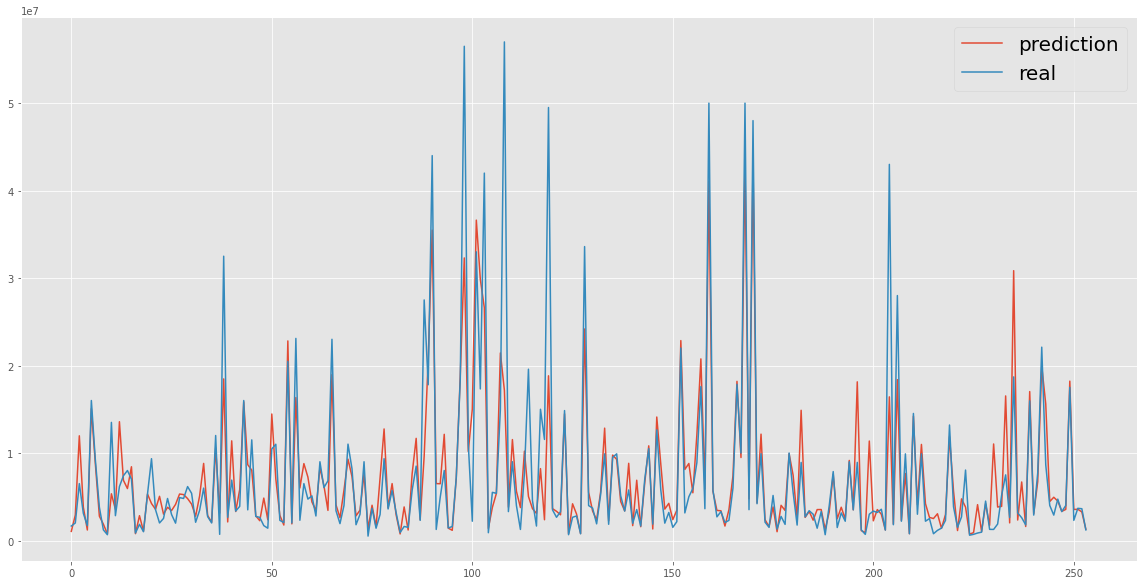

In [53]:
# 오답노트 : train set에서 오답노트를 확인하는 것은 자칫 overfitting 시킬 수 있어 조심해야하는 부분이지만 어느정도 인사이트를 줄 수 있다
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(val_data_y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

파란선이 실제 소비량, 붉은 선이 모데링 예측한 값.

# 7.train 셋 + val 셋 100% 활용하는 모델 만들기

In [54]:
train_x = train.drop(['id', 'target'], axis = 1)                # train 데이터에서 피쳐 추출
train_y = train.target                                          # train 데이터에서 target 추출

In [55]:
train_x

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,1,18277,1,1,1,1,1,1,2016,1
1,2,10,2,2,1,1,1,2,2019,1
2,3,83091,2,1,2,1,1,1,2012,2
3,4,91524,2,1,1,1,1,3,2007,3
4,5,94177,2,1,2,1,1,1,2010,1
...,...,...,...,...,...,...,...,...,...,...
1008,6,46768,2,1,1,1,1,2,2014,1
1009,18,31600,3,1,1,1,1,6,2011,1
1010,18,96802,3,1,1,1,1,2,2011,1
1011,20,146275,2,1,2,1,1,10,2013,3


In [56]:
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

# 8.예측하기

In [57]:
check_missing_col(test)                # 결측치 확인

test = test.drop('id', axis = 1)           # 분석에 필요없는 열 삭제
test = label_encoder(test, le)             # 범주형 피쳐 라벨 인코딩

test.head()

결측치가 존재하지 않습니다.


,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,29.0,1234,3.0,2,1.0,1,1,4.0,2017,10.0
1,16.0,29938,3.0,1,1.0,1,1,4.0,2013,6.0
2,0.0,87501,2.0,1,1.0,1,1,2.0,2012,10.0
3,22.0,180894,2.0,3,2.0,1,1,3.0,2001,1.0
4,85.0,104814,2.0,1,1.0,1,1,4.0,2000,1.0


In [58]:
train_x.info

<bound method DataFrame.info of       title  odometer  location  isimported  engine  transmission  fuel  \
0         1     18277         1           1       1             1     1   
1         2        10         2           2       1             1     1   
2         3     83091         2           1       2             1     1   
3         4     91524         2           1       1             1     1   
4         5     94177         2           1       2             1     1   
...     ...       ...       ...         ...     ...           ...   ...   
1008      6     46768         2           1       1             1     1   
1009     18     31600         3           1       1             1     1   
1010     18     96802         3           1       1             1     1   
1011     20    146275         2           1       2             1     1   
1012    201         0         2           3       2             2     2   

      paint  year  brand  
0         1  2016      1  
1         2  

In [59]:
test.info

<bound method DataFrame.info of      title  odometer  location  isimported  engine  transmission  fuel  paint  \
0     29.0      1234       3.0           2     1.0             1     1    4.0   
1     16.0     29938       3.0           1     1.0             1     1    4.0   
2      0.0     87501       2.0           1     1.0             1     1    2.0   
3     22.0    180894       2.0           3     2.0             1     1    3.0   
4     85.0    104814       2.0           1     1.0             1     1    4.0   
..     ...       ...       ...         ...     ...           ...   ...    ...   
431   91.0     78175       2.0           1     2.0             1     1    5.0   
432   66.0    129223       2.0           1     2.0             1     1    1.0   
433   17.0    100943       2.0           1     1.0             1     1    2.0   
434  136.0     81463       2.0           1     1.0             1     1    8.0   
435   22.0       646       2.0           1     2.0             1     1    6.0

In [60]:
y_pred = model.predict(test)
y_pred[0:5]

array([21500200.,  6662750.,  6710600.,  1152500.,  2322575.])

# 9.Dacon 제출하기

In [61]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [62]:
submission.info

<bound method DataFrame.info of       id  target
0      0       0
1      1       0
2      2       0
3      3       0
4      4       0
..   ...     ...
431  431       0
432  432       0
433  433       0
434  434       0
435  435       0

[436 rows x 2 columns]>

In [63]:
# 위에서 구한 예측값을 그대로 넣기
submission['target'] = y_pred

# 데이터 확인
submission.head()

,id,target
0,0,21500200.0
1,1,6662750.0
2,2,6710600.0
3,3,1152500.0
4,4,2322575.0


In [64]:
submission.to_csv('submit1.csv', index = False)